In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


import warnings
warnings.filterwarnings('ignore')

In [2]:
amazon_df = pd.read_csv('Amazon_Reviews.csv')

amazon_df

,Review,Label
0,Stuning even for the non-gamer: This sound tr...,1
1,The best soundtrack ever to anything.: I'm re...,1
2,Amazing!: This soundtrack is my favorite musi...,1
3,Excellent Soundtrack: I truly like this sound...,1
4,"Remember, Pull Your Jaw Off The Floor After H...",1
...,...,...
194,A Book That Is Worth a Second Look: This book...,1
195,Best game ever: This games makes even amazing...,1
196,Guitar in Absentia: With all due respect to a...,0
197,Stiff and Smells like drying paint: You get w...,0


In [3]:
y = amazon_df['Label']

amazon_df.drop(columns='Label',inplace=True)

In [4]:
regexp=RegexpTokenizer(r'\w+')

stopwords_en = stopwords.words('english')

lemmatizer = WordNetLemmatizer()

vectorizer=TfidfVectorizer()

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(amazon_df,y,test_size=0.2,random_state=42)

In [6]:
vectorizer.decode(x_train['Review'][0])

' Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate video game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [7]:
def preprocessing(review):
    
    tokens=regexp.tokenize(review)
    
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords_en]
    
    lemma_tokens=[lemmatizer.lemmatize(pure_token,pos='v') for pure_token in pure_tokens]
    
    return ' '.join(lemma_tokens)

In [8]:
x_train['Review'] = x_train['Review'].apply(preprocessing)

x_test['Review'] = x_test['Review'].apply(preprocessing)

In [9]:
x_train_tfidf = vectorizer.fit_transform(x_train['Review'])

x_test_tfidf = vectorizer.transform(x_test['Review'])

In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x_train_tfidf,y_train)

logreg_pred = logreg.predict(x_test_tfidf)

In [11]:
from sklearn.metrics import precision_score,confusion_matrix,recall_score,f1_score

confusion_matrix(y_test,logreg_pred)

array([[ 9,  6],
       [ 1, 24]], dtype=int64)

In [12]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(x_train_tfidf,y_train)

linreg_pred = linreg.predict(x_test_tfidf)


In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(x_train_tfidf,y_train)

train_pred = tree.predict(x_train_tfidf)

test_pred = tree.predict(x_test_tfidf)

print('train prediction',tree.predict(x_train_tfidf))

print('test prediction',tree.predict(x_test_tfidf))

train prediction [0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 1 0 1 0 1]
test prediction [1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0
 0 1 1]


In [14]:
tree.score(x_test_tfidf,y_test)

0.55

In [15]:
from sklearn.ensemble import RandomForestClassifier

no_of_trees = list(range(30,300,30))

accuracy=[]

for num in no_of_trees:
    
    forest=RandomForestClassifier(n_estimators=num)
    
    forest.fit(x_train_tfidf,y_train)
    
    accuracy.append(forest.score(x_train_tfidf,y_train))

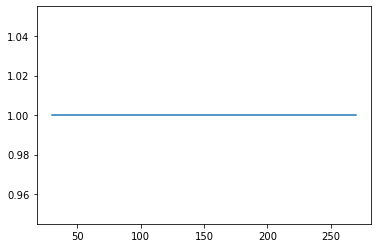

In [16]:
plt.plot(no_of_trees,accuracy)

In [17]:
from sklearn.ensemble import AdaBoostClassifier

learning_range = np.arange(0.02,1,0.2)
accuracy_1=[]

for rate in  learning_range :
    a_boost = AdaBoostClassifier( learning_rate = rate)
    a_boost.fit(x_train_tfidf,y_train)
    accuracy_1.append(a_boost.score(x_train_tfidf,y_train))
    

Text(0, 0.5, 'Accuracy')

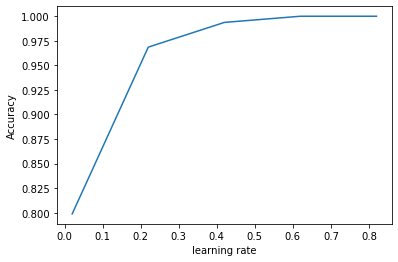

In [18]:
plt.plot(learning_range,accuracy_1)
plt.xlabel('learning rate')
plt.ylabel('Accuracy')

In [19]:
# GridSearchCV with RandomForestClassifier

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=10)

param_dict = ({'n_estimators':[3,5.6],
              'max_depth':[3,8,9],
              'max_features':['auto','sqrt','log2'],
              'min_samples_split':[4,7,9]
              })

In [20]:
gcv = GridSearchCV(rf, param_grid = param_dict, cv=5,verbose=5)

gcv.fit(x_train_tfidf,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=3, max_features=auto, min_samples_split=4, n_estimators=3 
[CV]  max_depth=3, max_features=auto, min_samples_split=4, n_estimators=3, score=0.531, total=   0.0s
[CV] max_depth=3, max_features=auto, min_samples_split=4, n_estimators=3 
[CV]  max_depth=3, max_features=auto, min_samples_split=4, n_estimators=3, score=0.562, total=   0.0s
[CV] max_depth=3, max_features=auto, min_samples_split=4, n_estimators=3 
[CV]  max_depth=3, max_features=auto, min_samples_split=4, n_estimators=3, score=0.562, total=   0.0s
[CV] max_depth=3, max_features=auto, min_samples_split=4, n_estimators=3 
[CV]  max_depth=3, max_features=auto, min_samples_split=4, n_estimators=3, score=0.625, total=   0.0s
[CV] max_depth=3, max_features=auto, min_samples_split=4, n_estimators=3 
[CV]  max_depth=3, max_features=auto, min_samples_split=4, n_estimators=3, score=0.613, total=   0.0s
[CV] max_depth=3, max_features=auto, min_samples_split=4, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=3, max_features=auto, min_samples_split=7, n_estimators=3 
[CV]  max_depth=3, max_features=auto, min_samples_split=7, n_estimators=3, score=0.562, total=   0.0s
[CV] max_depth=3, max_features=auto, min_samples_split=7, n_estimators=3 
[CV]  max_depth=3, max_features=auto, min_samples_split=7, n_estimators=3, score=0.562, total=   0.0s
[CV] max_depth=3, max_features=auto, min_samples_split=7, n_estimators=3 
[CV]  max_depth=3, max_features=auto, min_samples_split=7, n_estimators=3, score=0.625, total=   0.0s
[CV] max_depth=3, max_features=auto, min_samples_split=7, n_estimators=3 
[CV]  max_depth=3, max_features=auto, min_samples_split=7, n_estimators=3, score=0.613, total=   0.0s
[CV] max_depth=3, max_features=auto, min_samples_split=7, n_estimators=5.6 
[CV]  max_depth=3, max_features=auto, min_samples_split=7, n_estimators=5.6, score=nan, total=   0.0s
[CV] max_depth=3, max_features=auto, min_samples_split=7, n_estimators=5.6 
[CV]  max_depth=3, max_features=auto, min

[CV]  max_depth=3, max_features=log2, min_samples_split=4, n_estimators=3, score=0.562, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_split=4, n_estimators=3 
[CV]  max_depth=3, max_features=log2, min_samples_split=4, n_estimators=3, score=0.581, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_split=4, n_estimators=5.6 
[CV]  max_depth=3, max_features=log2, min_samples_split=4, n_estimators=5.6, score=nan, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_split=4, n_estimators=5.6 
[CV]  max_depth=3, max_features=log2, min_samples_split=4, n_estimators=5.6, score=nan, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_split=4, n_estimators=5.6 
[CV]  max_depth=3, max_features=log2, min_samples_split=4, n_estimators=5.6, score=nan, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_split=4, n_estimators=5.6 
[CV]  max_depth=3, max_features=log2, min_samples_split=4, n_estimators=5.6, score=nan, total=   0.0s
[CV] max_d

[CV]  max_depth=8, max_features=auto, min_samples_split=9, n_estimators=5.6, score=nan, total=   0.0s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=3 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=3, score=0.594, total=   0.0s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=3 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=3, score=0.562, total=   0.0s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=3 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=3, score=0.625, total=   0.0s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=3 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=3, score=0.656, total=   0.0s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=3 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=3, score=0.613, total=   0.0s
[CV] max_depth=8, 

[CV] max_depth=8, max_features=log2, min_samples_split=7, n_estimators=5.6 
[CV]  max_depth=8, max_features=log2, min_samples_split=7, n_estimators=5.6, score=nan, total=   0.0s
[CV] max_depth=8, max_features=log2, min_samples_split=9, n_estimators=3 
[CV]  max_depth=8, max_features=log2, min_samples_split=9, n_estimators=3, score=0.594, total=   0.0s
[CV] max_depth=8, max_features=log2, min_samples_split=9, n_estimators=3 
[CV]  max_depth=8, max_features=log2, min_samples_split=9, n_estimators=3, score=0.594, total=   0.0s
[CV] max_depth=8, max_features=log2, min_samples_split=9, n_estimators=3 
[CV]  max_depth=8, max_features=log2, min_samples_split=9, n_estimators=3, score=0.531, total=   0.0s
[CV] max_depth=8, max_features=log2, min_samples_split=9, n_estimators=3 
[CV]  max_depth=8, max_features=log2, min_samples_split=9, n_estimators=3, score=0.594, total=   0.0s
[CV] max_depth=8, max_features=log2, min_samples_split=9, n_estimators=3 
[CV]  max_depth=8, max_features=log2, min_sa

[CV] max_depth=9, max_features=sqrt, min_samples_split=7, n_estimators=3 
[CV]  max_depth=9, max_features=sqrt, min_samples_split=7, n_estimators=3, score=0.656, total=   0.0s
[CV] max_depth=9, max_features=sqrt, min_samples_split=7, n_estimators=3 
[CV]  max_depth=9, max_features=sqrt, min_samples_split=7, n_estimators=3, score=0.548, total=   0.0s
[CV] max_depth=9, max_features=sqrt, min_samples_split=7, n_estimators=5.6 
[CV]  max_depth=9, max_features=sqrt, min_samples_split=7, n_estimators=5.6, score=nan, total=   0.0s
[CV] max_depth=9, max_features=sqrt, min_samples_split=7, n_estimators=5.6 
[CV]  max_depth=9, max_features=sqrt, min_samples_split=7, n_estimators=5.6, score=nan, total=   0.0s
[CV] max_depth=9, max_features=sqrt, min_samples_split=7, n_estimators=5.6 
[CV]  max_depth=9, max_features=sqrt, min_samples_split=7, n_estimators=5.6, score=nan, total=   0.0s
[CV] max_depth=9, max_features=sqrt, min_samples_split=7, n_estimators=5.6 
[CV]  max_depth=9, max_features=sqrt, 

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.9s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': [3, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [4, 7, 9],
                         'n_estimators': [3, 5.6]},
             verbose=5)

In [21]:
predictions = gcv.predict(x_test_tfidf)

predictions

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [22]:
print('confusin matrix',confusion_matrix(y_test,predictions))

print('Recall Score',recall_score(y_test,predictions))

print('Precision Score',precision_score(y_test,predictions))

print('F1 Score',f1_score(y_test,predictions))

confusin matrix [[ 8  7]
 [ 5 20]]
Recall Score 0.8
Precision Score 0.7407407407407407
F1 Score 0.7692307692307692


In [23]:
# RandomSearchCV with RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=10)

param_dict = ({'n_estimators':[3,5.6],
              'max_depth':[3,8,9],
              'max_features':['auto','sqrt','log2'],
              'min_samples_split':[4,7,9]
              })

In [24]:
rsc = RandomizedSearchCV(rf,param_distributions=param_dict,n_iter=150,cv=5,verbose=5)

rsc.fit(x_train_tfidf,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] n_estimators=3, min_samples_split=4, max_features=auto, max_depth=3 
[CV]  n_estimators=3, min_samples_split=4, max_features=auto, max_depth=3, score=0.531, total=   0.0s
[CV] n_estimators=3, min_samples_split=4, max_features=auto, max_depth=3 
[CV]  n_estimators=3, min_samples_split=4, max_features=auto, max_depth=3, score=0.562, total=   0.0s
[CV] n_estimators=3, min_samples_split=4, max_features=auto, max_depth=3 
[CV]  n_estimators=3, min_samples_split=4, max_features=auto, max_depth=3, score=0.562, total=   0.0s
[CV] n_estimators=3, min_samples_split=4, max_features=auto, max_depth=3 
[CV]  n_estimators=3, min_samples_split=4, max_features=auto, max_depth=3, score=0.625, total=   0.0s
[CV] n_estimators=3, min_samples_split=4, max_features=auto, max_depth=3 
[CV]  n_estimators=3, min_samples_split=4, max_features=auto, max_depth=3, score=0.613, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=4, max_features=a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=3, min_samples_split=7, max_features=auto, max_depth=3, score=0.613, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=7, max_features=auto, max_depth=3 
[CV]  n_estimators=5.6, min_samples_split=7, max_features=auto, max_depth=3, score=nan, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=7, max_features=auto, max_depth=3 
[CV]  n_estimators=5.6, min_samples_split=7, max_features=auto, max_depth=3, score=nan, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=7, max_features=auto, max_depth=3 
[CV]  n_estimators=5.6, min_samples_split=7, max_features=auto, max_depth=3, score=nan, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=7, max_features=auto, max_depth=3 
[CV]  n_estimators=5.6, min_samples_split=7, max_features=auto, max_depth=3, score=nan, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=7, max_features=auto, max_depth=3 
[CV]  n_estimators=5.6, min_samples_split=7, max_features=auto, max_depth=3, score=nan, total=   0.0s
[CV] n_e

[CV] n_estimators=5.6, min_samples_split=4, max_features=log2, max_depth=3 
[CV]  n_estimators=5.6, min_samples_split=4, max_features=log2, max_depth=3, score=nan, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=4, max_features=log2, max_depth=3 
[CV]  n_estimators=5.6, min_samples_split=4, max_features=log2, max_depth=3, score=nan, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=4, max_features=log2, max_depth=3 
[CV]  n_estimators=5.6, min_samples_split=4, max_features=log2, max_depth=3, score=nan, total=   0.0s
[CV] n_estimators=3, min_samples_split=7, max_features=log2, max_depth=3 
[CV]  n_estimators=3, min_samples_split=7, max_features=log2, max_depth=3, score=0.562, total=   0.0s
[CV] n_estimators=3, min_samples_split=7, max_features=log2, max_depth=3 
[CV]  n_estimators=3, min_samples_split=7, max_features=log2, max_depth=3, score=0.594, total=   0.0s
[CV] n_estimators=3, min_samples_split=7, max_features=log2, max_depth=3 
[CV]  n_estimators=3, min_samples_split=

[CV]  n_estimators=5.6, min_samples_split=4, max_features=sqrt, max_depth=8, score=nan, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=5.6, min_samples_split=4, max_features=sqrt, max_depth=8, score=nan, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=5.6, min_samples_split=4, max_features=sqrt, max_depth=8, score=nan, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=5.6, min_samples_split=4, max_features=sqrt, max_depth=8, score=nan, total=   0.0s
[CV] n_estimators=3, min_samples_split=7, max_features=sqrt, max_depth=8 
[CV]  n_estimators=3, min_samples_split=7, max_features=sqrt, max_depth=8, score=0.594, total=   0.0s
[CV] n_estimators=3, min_samples_split=7, max_features=sqrt, max_depth=8 
[CV]  n_estimators=3, min_samples_split=7, max_features=sqrt, max_depth=8, score=0.562, total=   0.0s
[CV] n_estim

[CV]  n_estimators=5.6, min_samples_split=4, max_features=auto, max_depth=9, score=nan, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=4, max_features=auto, max_depth=9 
[CV]  n_estimators=5.6, min_samples_split=4, max_features=auto, max_depth=9, score=nan, total=   0.0s
[CV] n_estimators=3, min_samples_split=7, max_features=auto, max_depth=9 
[CV]  n_estimators=3, min_samples_split=7, max_features=auto, max_depth=9, score=0.656, total=   0.0s
[CV] n_estimators=3, min_samples_split=7, max_features=auto, max_depth=9 
[CV]  n_estimators=3, min_samples_split=7, max_features=auto, max_depth=9, score=0.594, total=   0.0s
[CV] n_estimators=3, min_samples_split=7, max_features=auto, max_depth=9 
[CV]  n_estimators=3, min_samples_split=7, max_features=auto, max_depth=9, score=0.625, total=   0.0s
[CV] n_estimators=3, min_samples_split=7, max_features=auto, max_depth=9 
[CV]  n_estimators=3, min_samples_split=7, max_features=auto, max_depth=9, score=0.656, total=   0.0s
[CV] n_estimator

[CV]  n_estimators=3, min_samples_split=7, max_features=log2, max_depth=9, score=0.594, total=   0.0s
[CV] n_estimators=3, min_samples_split=7, max_features=log2, max_depth=9 
[CV]  n_estimators=3, min_samples_split=7, max_features=log2, max_depth=9, score=0.613, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=7, max_features=log2, max_depth=9 
[CV]  n_estimators=5.6, min_samples_split=7, max_features=log2, max_depth=9, score=nan, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=7, max_features=log2, max_depth=9 
[CV]  n_estimators=5.6, min_samples_split=7, max_features=log2, max_depth=9, score=nan, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=7, max_features=log2, max_depth=9 
[CV]  n_estimators=5.6, min_samples_split=7, max_features=log2, max_depth=9, score=nan, total=   0.0s
[CV] n_estimators=5.6, min_samples_split=7, max_features=log2, max_depth=9 
[CV]  n_estimators=5.6, min_samples_split=7, max_features=log2, max_depth=9, score=nan, total=   0.0s
[CV] n_est

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_iter=150,
                   param_distributions={'max_depth': [3, 8, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [4, 7, 9],
                                        'n_estimators': [3, 5.6]},
                   verbose=5)

In [25]:
rcv_predictions = rsc.predict(x_test_tfidf)

rcv_predictions

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [26]:
print('confusin matrix',confusion_matrix(y_test,rcv_predictions))

print('Recall Score',recall_score(y_test,rcv_predictions))

print('Precision Score',precision_score(y_test,rcv_predictions))

print('F1 Score',f1_score(y_test,rcv_predictions))

confusin matrix [[ 8  7]
 [ 5 20]]
Recall Score 0.8
Precision Score 0.7407407407407407
F1 Score 0.7692307692307692


In [27]:
# GradientBoostingClassifier for GridSearchCV

param_dict = ({'n_estimators':[4,6,7],
               'learning_rate':[0.01,0.5,1],
               'max_depth':[6,7,8]
              })

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=10)

gcv2 = GridSearchCV(gbc, param_grid = param_dict, cv=5,verbose=5)

gcv2.fit(x_train_tfidf,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] learning_rate=0.01, max_depth=6, n_estimators=4 .................
[CV]  learning_rate=0.01, max_depth=6, n_estimators=4, score=0.531, total=   0.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=4 .................
[CV]  learning_rate=0.01, max_depth=6, n_estimators=4, score=0.531, total=   0.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=4 .................
[CV]  learning_rate=0.01, max_depth=6, n_estimators=4, score=0.531, total=   0.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=4 .................
[CV]  learning_rate=0.01, max_depth=6, n_estimators=4, score=0.562, total=   0.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=4 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=6, n_estimators=4, score=0.548, total=   0.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=6 .................
[CV]  learning_rate=0.01, max_depth=6, n_estimators=6, score=0.531, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=6 .................
[CV]  learning_rate=0.01, max_depth=6, n_estimators=6, score=0.531, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=6 .................
[CV]  learning_rate=0.01, max_depth=6, n_estimators=6, score=0.531, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=6 .................
[CV]  learning_rate=0.01, max_depth=6, n_estimators=6, score=0.562, total=   0.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=6 .................
[CV]  learning_rate=0.01, max_depth=6, n_estimators=6, score=0.548, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=7 .................
[CV]  learning_rate=0.01, max_depth=6, n_estimators=7, score=0.531, total=   0.1s


[CV]  learning_rate=0.5, max_depth=6, n_estimators=7, score=0.594, total=   0.1s
[CV] learning_rate=0.5, max_depth=6, n_estimators=7 ..................
[CV]  learning_rate=0.5, max_depth=6, n_estimators=7, score=0.516, total=   0.0s
[CV] learning_rate=0.5, max_depth=7, n_estimators=4 ..................
[CV]  learning_rate=0.5, max_depth=7, n_estimators=4, score=0.594, total=   0.0s
[CV] learning_rate=0.5, max_depth=7, n_estimators=4 ..................
[CV]  learning_rate=0.5, max_depth=7, n_estimators=4, score=0.594, total=   0.0s
[CV] learning_rate=0.5, max_depth=7, n_estimators=4 ..................
[CV]  learning_rate=0.5, max_depth=7, n_estimators=4, score=0.531, total=   0.0s
[CV] learning_rate=0.5, max_depth=7, n_estimators=4 ..................
[CV]  learning_rate=0.5, max_depth=7, n_estimators=4, score=0.656, total=   0.1s
[CV] learning_rate=0.5, max_depth=7, n_estimators=4 ..................
[CV]  learning_rate=0.5, max_depth=7, n_estimators=4, score=0.677, total=   0.0s
[CV] le

[CV]  learning_rate=1, max_depth=7, n_estimators=6, score=0.581, total=   0.1s
[CV] learning_rate=1, max_depth=7, n_estimators=7 ....................
[CV]  learning_rate=1, max_depth=7, n_estimators=7, score=0.531, total=   0.0s
[CV] learning_rate=1, max_depth=7, n_estimators=7 ....................
[CV]  learning_rate=1, max_depth=7, n_estimators=7, score=0.562, total=   0.1s
[CV] learning_rate=1, max_depth=7, n_estimators=7 ....................
[CV]  learning_rate=1, max_depth=7, n_estimators=7, score=0.500, total=   0.1s
[CV] learning_rate=1, max_depth=7, n_estimators=7 ....................
[CV]  learning_rate=1, max_depth=7, n_estimators=7, score=0.688, total=   0.1s
[CV] learning_rate=1, max_depth=7, n_estimators=7 ....................
[CV]  learning_rate=1, max_depth=7, n_estimators=7, score=0.581, total=   0.1s
[CV] learning_rate=1, max_depth=8, n_estimators=4 ....................
[CV]  learning_rate=1, max_depth=8, n_estimators=4, score=0.562, total=   0.0s
[CV] learning_rate=1,

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    7.3s finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
             param_grid={'learning_rate': [0.01, 0.5, 1],
                         'max_depth': [6, 7, 8], 'n_estimators': [4, 6, 7]},
             verbose=5)

In [29]:
gcv2_pred = gcv2.predict(x_test_tfidf)

gcv2_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [30]:
print('confusion matrix',confusion_matrix(y_test,gcv2_pred))

print('Recall Score',recall_score(y_test,rcv_predictions))

print('Precision Score',precision_score(y_test,rcv_predictions))

print('f1 score',f1_score(y_test,gcv2_pred))

confusion matrix [[10  5]
 [12 13]]
Recall Score 0.8
Precision Score 0.7407407407407407
f1 score 0.6046511627906976


In [31]:
# GradientBoosting for RandomizedSearchCV

param_dict = ({'n_estimators':[4,6,7],
               'learning_rate':[0.02,0.5,1],
               'max_depth':[5,6,8]
              })

In [32]:
# GradientBoosting for RandomizedSearch

grad_boost = GradientBoostingClassifier(random_state=10)

random_cv = RandomizedSearchCV(grad_boost, param_distributions = param_dict, n_iter =50, cv=5,verbose=5)

random_cv.fit(x_train_tfidf,y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] n_estimators=4, max_depth=5, learning_rate=0.02 .................
[CV]  n_estimators=4, max_depth=5, learning_rate=0.02, score=0.531, total=   0.0s
[CV] n_estimators=4, max_depth=5, learning_rate=0.02 .................
[CV]  n_estimators=4, max_depth=5, learning_rate=0.02, score=0.531, total=   0.0s
[CV] n_estimators=4, max_depth=5, learning_rate=0.02 .................
[CV]  n_estimators=4, max_depth=5, learning_rate=0.02, score=0.531, total=   0.0s
[CV] n_estimators=4, max_depth=5, learning_rate=0.02 .................
[CV]  n_estimators=4, max_depth=5, learning_rate=0.02, score=0.531, total=   0.0s
[CV] n_estimators=4, max_depth=5, learning_rate=0.02 .................
[CV]  n_estimators=4, max_depth=5, learning_rate=0.02, score=0.548, total=   0.0s
[CV] n_estimators=6, max_depth=5, learning_rate=0.02 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=6, max_depth=5, learning_rate=0.02, score=0.594, total=   0.0s
[CV] n_estimators=6, max_depth=5, learning_rate=0.02 .................
[CV]  n_estimators=6, max_depth=5, learning_rate=0.02, score=0.562, total=   0.0s
[CV] n_estimators=6, max_depth=5, learning_rate=0.02 .................
[CV]  n_estimators=6, max_depth=5, learning_rate=0.02, score=0.500, total=   0.0s
[CV] n_estimators=6, max_depth=5, learning_rate=0.02 .................
[CV]  n_estimators=6, max_depth=5, learning_rate=0.02, score=0.531, total=   0.0s
[CV] n_estimators=6, max_depth=5, learning_rate=0.02 .................
[CV]  n_estimators=6, max_depth=5, learning_rate=0.02, score=0.548, total=   0.0s
[CV] n_estimators=7, max_depth=5, learning_rate=0.02 .................
[CV]  n_estimators=7, max_depth=5, learning_rate=0.02, score=0.562, total=   0.1s
[CV] n_estimators=7, max_depth=5, learning_rate=0.02 .................
[CV]  n_estimators=7, max_depth=5, learning_rate=0.02, score=0.562, total=   0.0s


[CV]  n_estimators=4, max_depth=6, learning_rate=0.5, score=0.516, total=   0.0s
[CV] n_estimators=6, max_depth=6, learning_rate=0.5 ..................
[CV]  n_estimators=6, max_depth=6, learning_rate=0.5, score=0.625, total=   0.1s
[CV] n_estimators=6, max_depth=6, learning_rate=0.5 ..................
[CV]  n_estimators=6, max_depth=6, learning_rate=0.5, score=0.594, total=   0.1s
[CV] n_estimators=6, max_depth=6, learning_rate=0.5 ..................
[CV]  n_estimators=6, max_depth=6, learning_rate=0.5, score=0.562, total=   0.1s
[CV] n_estimators=6, max_depth=6, learning_rate=0.5 ..................
[CV]  n_estimators=6, max_depth=6, learning_rate=0.5, score=0.594, total=   0.1s
[CV] n_estimators=6, max_depth=6, learning_rate=0.5 ..................
[CV]  n_estimators=6, max_depth=6, learning_rate=0.5, score=0.452, total=   0.0s
[CV] n_estimators=7, max_depth=6, learning_rate=0.5 ..................
[CV]  n_estimators=7, max_depth=6, learning_rate=0.5, score=0.594, total=   0.0s
[CV] n_

[CV]  n_estimators=4, max_depth=8, learning_rate=1, score=0.562, total=   0.0s
[CV] n_estimators=4, max_depth=8, learning_rate=1 ....................
[CV]  n_estimators=4, max_depth=8, learning_rate=1, score=0.500, total=   0.0s
[CV] n_estimators=4, max_depth=8, learning_rate=1 ....................
[CV]  n_estimators=4, max_depth=8, learning_rate=1, score=0.500, total=   0.0s
[CV] n_estimators=4, max_depth=8, learning_rate=1 ....................
[CV]  n_estimators=4, max_depth=8, learning_rate=1, score=0.548, total=   0.0s
[CV] n_estimators=6, max_depth=8, learning_rate=1 ....................
[CV]  n_estimators=6, max_depth=8, learning_rate=1, score=0.531, total=   0.0s
[CV] n_estimators=6, max_depth=8, learning_rate=1 ....................
[CV]  n_estimators=6, max_depth=8, learning_rate=1, score=0.562, total=   0.1s
[CV] n_estimators=6, max_depth=8, learning_rate=1 ....................
[CV]  n_estimators=6, max_depth=8, learning_rate=1, score=0.500, total=   0.1s
[CV] n_estimators=6, 

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    7.1s finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
                   n_iter=50,
                   param_distributions={'learning_rate': [0.02, 0.5, 1],
                                        'max_depth': [5, 6, 8],
                                        'n_estimators': [4, 6, 7]},
                   verbose=5)

In [33]:
randomcv_pred = random_cv.predict(x_test_tfidf)

print('f1 score',f1_score(y_test,randomcv_pred))


f1 score 0.72


In [34]:
param_dicts = ({'C':[0.01,0.1,1,10],
              'gamma':['scale', 'auto'] ,
               'kernel': ['linear', 'rbf', 'sigmoid'] 
              })

In [35]:
# Support Vector Classifier

from sklearn.svm import SVC

svm = SVC(random_state=10)

gcv_3 = GridSearchCV(svm, param_grid = param_dicts, cv=5,verbose=5)

gcv_3.fit(x_train_tfidf,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] .. C=0.01, gamma=scale, kernel=linear, score=0.531, total=   0.1s
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] .. C=0.01, gamma=scale, kernel=linear, score=0.531, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] .. C=0.01, gamma=scale, kernel=linear, score=0.531, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] .. C=0.01, gamma=scale, kernel=linear, score=0.562, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] .. C=0.01, gamma=scale, kernel=linear, score=0.548, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.01, gamma=scale, kernel=rbf, score=0.531, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf .................................
[CV] ..... C=0.01, gamma=scale, kernel=rbf, score=0.531, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf .................................
[CV] ..... C=0.01, gamma=scale, kernel=rbf, score=0.531, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf .................................
[CV] ..... C=0.01, gamma=scale, kernel=rbf, score=0.562, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf .................................
[CV] ..... C=0.01, gamma=scale, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=sigmoid .............................
[CV] . C=0.01, gamma=scale, kernel=sigmoid, score=0.531, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=sigmoid .............................
[CV] . C=0.01, gamma=scale, kernel=sigmoid, score=0.531, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=sigmoid .............................
[CV] .

[CV] ..... C=1, gamma=scale, kernel=linear, score=0.719, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] ..... C=1, gamma=scale, kernel=linear, score=0.613, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.594, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.594, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.645, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.5s finished


GridSearchCV(cv=5, estimator=SVC(random_state=10),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=5)

In [36]:
# MultinomialNB for NaiveBayesTheorem

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(x_train_tfidf,y_train)

mnb_pred = mnb.predict(x_test_tfidf)

print('f1 ',f1_score(y_test,mnb_pred))

#print('accuracy',accuracy_score(y_test,mnb_pred))

f1  0.851851851851852


In [37]:

sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(verbose=4)

sgd_reg.fit(x_train_tfidf,y_train)


-- Epoch 1
Norm: 0.06, NNZs: 2348, Bias: 0.003199, T: 159, Avg. loss: 0.266794
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 2348, Bias: 0.005328, T: 318, Avg. loss: 0.259898
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.14, NNZs: 2348, Bias: 0.007164, T: 477, Avg. loss: 0.254774
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.18, NNZs: 2348, Bias: 0.008825, T: 636, Avg. loss: 0.250320
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.21, NNZs: 2348, Bias: 0.010368, T: 795, Avg. loss: 0.246295
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.23, NNZs: 2348, Bias: 0.011817, T: 954, Avg. loss: 0.242580
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 0.26, NNZs: 2348, Bias: 0.013189, T: 1113, Avg. loss: 0.239116
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 0.29, NNZs: 2348, Bias: 0.014499, T: 1272, Avg. loss: 0.235857
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 0.31, NNZs: 2348, Bias: 0.015753, T: 1431, Avg. loss: 0.232772
Total 

SGDRegressor(verbose=4)

In [38]:
# K-Means Clustering

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

kmeans = KMeans()

kmeans.fit(x_train_tfidf)

kmeans_pred = kmeans.predict(x_test_tfidf)


In [39]:
num_clusters = range(2,10)

wss = []

for n in num_clusters:
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(x_train_tfidf)
    wss.append(kmeans.inertia_)
    

Text(0.5, 1.0, 'Elbow Curve')

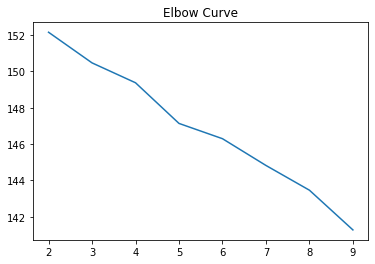

In [40]:
plt.plot(num_clusters,wss)

plt.title('Elbow Curve')


In [41]:
kmeans_1=KMeans(n_clusters=7)

kmeans_1.fit(x_train_tfidf)

kmeans_1.predict(x_test_tfidf)

array([0, 2, 1, 2, 6, 5, 1, 1, 0, 5, 6, 2, 2, 6, 2, 2, 2, 2, 6, 0, 0, 2,
       4, 5, 1, 4, 6, 2, 6, 2, 4, 0, 2, 5, 2, 1, 3, 3, 1, 3])

In [42]:
!pip install spacy

In [43]:
import spacy